# Exam Model 

by

**Remella Satya Ramana Kumar**

In [220]:
import warnings
warnings.filterwarnings('ignore')

In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [222]:
data = pd.read_csv("S:\exam.csv",low_memory = False)

# EDA

In [223]:
data.head()

,id,group,sex,quanti,points,exam,passed
0,0,A,m,9,65.0,60.5,yes
1,0,A,m,9,73.5,50,yes
2,0,A,m,9,77.0,37,yes
3,0,B,m,9,80.0,41,yes
4,0,B,m,9,80.0,68,yes


In [224]:
data.shape

(113, 7)

In [225]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      113 non-null    int64  
 1   group   113 non-null    object 
 2   sex     113 non-null    object 
 3   quanti  113 non-null    int64  
 4   points  113 non-null    float64
 5   exam    113 non-null    object 
 6   passed  113 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 6.3+ KB


In [226]:
c = data.isnull().sum()
i = len(data.index)
null_data = round(100*(c/i),2)
null_data[null_data>0]

Series([], dtype: float64)

In [227]:
data.isnull().sum()

id        0
group     0
sex       0
quanti    0
points    0
exam      0
passed    0
dtype: int64

In [228]:
data = data.drop(['id'],axis=1)

In [229]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   group   113 non-null    object 
 1   sex     113 non-null    object 
 2   quanti  113 non-null    int64  
 3   points  113 non-null    float64
 4   exam    113 non-null    object 
 5   passed  113 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 5.4+ KB


In [230]:
print(data['group'])

0      A
1      A
2      A
3      B
4      B
      ..
108    B
109    B
110    B
111    C
112    C
Name: group, Length: 113, dtype: object


In [231]:
data = pd.get_dummies(data = data,columns = ['group' , 'sex'])

In [232]:
data.columns

Index(['quanti', 'points', 'exam', 'passed', 'group_A', 'group_B', 'group_C',
       'sex_f', 'sex_m'],
      dtype='object')

In [233]:
data= data.drop(['exam'],axis=1)

In [234]:
data.columns

Index(['quanti', 'points', 'passed', 'group_A', 'group_B', 'group_C', 'sex_f',
       'sex_m'],
      dtype='object')

# Regresssion 

In [235]:
data.passed = data.passed.map({'yes':1,'no':0})

In [236]:
y = data.pop('passed')

In [237]:
X = data

### Test train split 

- A train test split is when you split your data into a training set and a testing set. The training set is used for training the model, and the testing set is used to test your model. This allows you to train your models on the training set, and then test their accuracy on the unseen testing set.

In [238]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3, random_state=100)

In [239]:
X_train.shape

(79, 7)

In [240]:
X_test.shape

(34, 7)

# Scaling

In [241]:
var = ['points','quanti']
scaler = MinMaxScaler()

# Scaler transform
X_train[var] = scaler.fit_transform(X_train[var])

#X_train[var] = scaler.fit_transform(X_train[var])

In [242]:
X_train.head()

,quanti,points,group_A,group_B,group_C,sex_f,sex_m
20,0.555556,0.412088,0,0,1,0,1
37,0.666667,0.428571,1,0,0,0,1
6,1.000000,0.736264,0,1,0,0,1
3,0.888889,0.846154,0,1,0,0,1
12,1.000000,0.928571,1,0,0,0,1


### RFE

In [243]:
lr = LinearRegression()
lr.fit(X_train,y_train)
rfe = RFE(lr,n_features_to_select = 5)
rfe = rfe.fit(X_train,y_train)

In [244]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('quanti', False, 3),
 ('points', True, 1),
 ('group_A', True, 1),
 ('group_B', True, 1),
 ('group_C', True, 1),
 ('sex_f', True, 1),
 ('sex_m', False, 2)]

In [245]:
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [246]:
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [247]:
X_train.columns[rfe.support_]

Index(['points', 'group_A', 'group_B', 'group_C', 'sex_f'], dtype='object')

In [248]:
cols = ['points', 'group_A', 'group_B', 'group_C', 'sex_f']
build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                 passed   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     19.04
Date:                Thu, 21 Dec 2023   Prob (F-statistic):           8.38e-11
Time:                        00:45:58   Log-Likelihood:                -29.071
No. Observations:                  79   AIC:                             68.14
Df Residuals:                      74   BIC:                             79.99
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2325      0.081     -2.867      0.0

In [249]:
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [250]:
#Let us build the finalmodel using sklearn
cols = ['points', 'group_A', 'group_B', 'group_C', 'sex_f']

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)

In [251]:
print(lr.coef_)

[ 1.40093556  0.0065152   0.03259121 -0.03910641  0.00269722]


In [252]:
print(lr.intercept_)

-0.3100542816914431


In [253]:
y_train_pred = lr.predict(X_train[cols])

Text(0.5, 0, 'Errors')

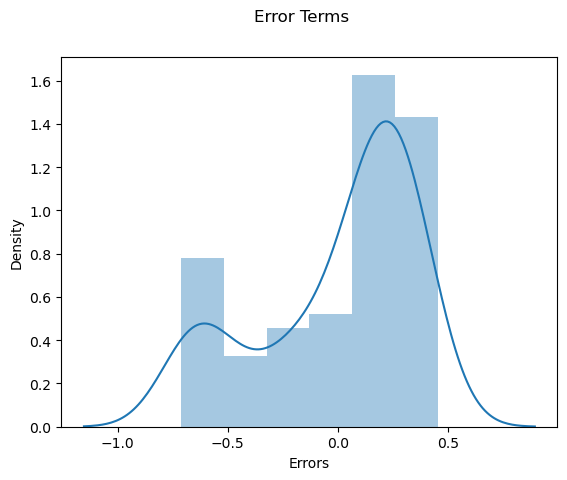

In [254]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot(y_train - y_train_pred)
fig.suptitle('Error Terms') 
plt.xlabel('Errors')

**Train R-Squared**

In [255]:
r2_score(y_train,y_train_pred)

0.5072390739029742

## Test Preparation

In [256]:
#Scale variables in X_test
var = ['points','quanti']

#Test data to be transformed only, no fitting
X_test[var] = scaler.transform(X_test[var])

In [257]:
#Columns from our final model
cols = ['points', 'group_A', 'group_B', 'group_C', 'sex_f']

#Predict the values for test data
y_pred = lr.predict(X_test[cols])

**Test R-Squared**

In [258]:
r2_score(y_test,y_pred)

0.4168569283549608

**['points', 'group_A', 'group_B', 'group_C', 'sex_f']** Columns are Important

## END